## Quantum Fourier Transform by definitoin

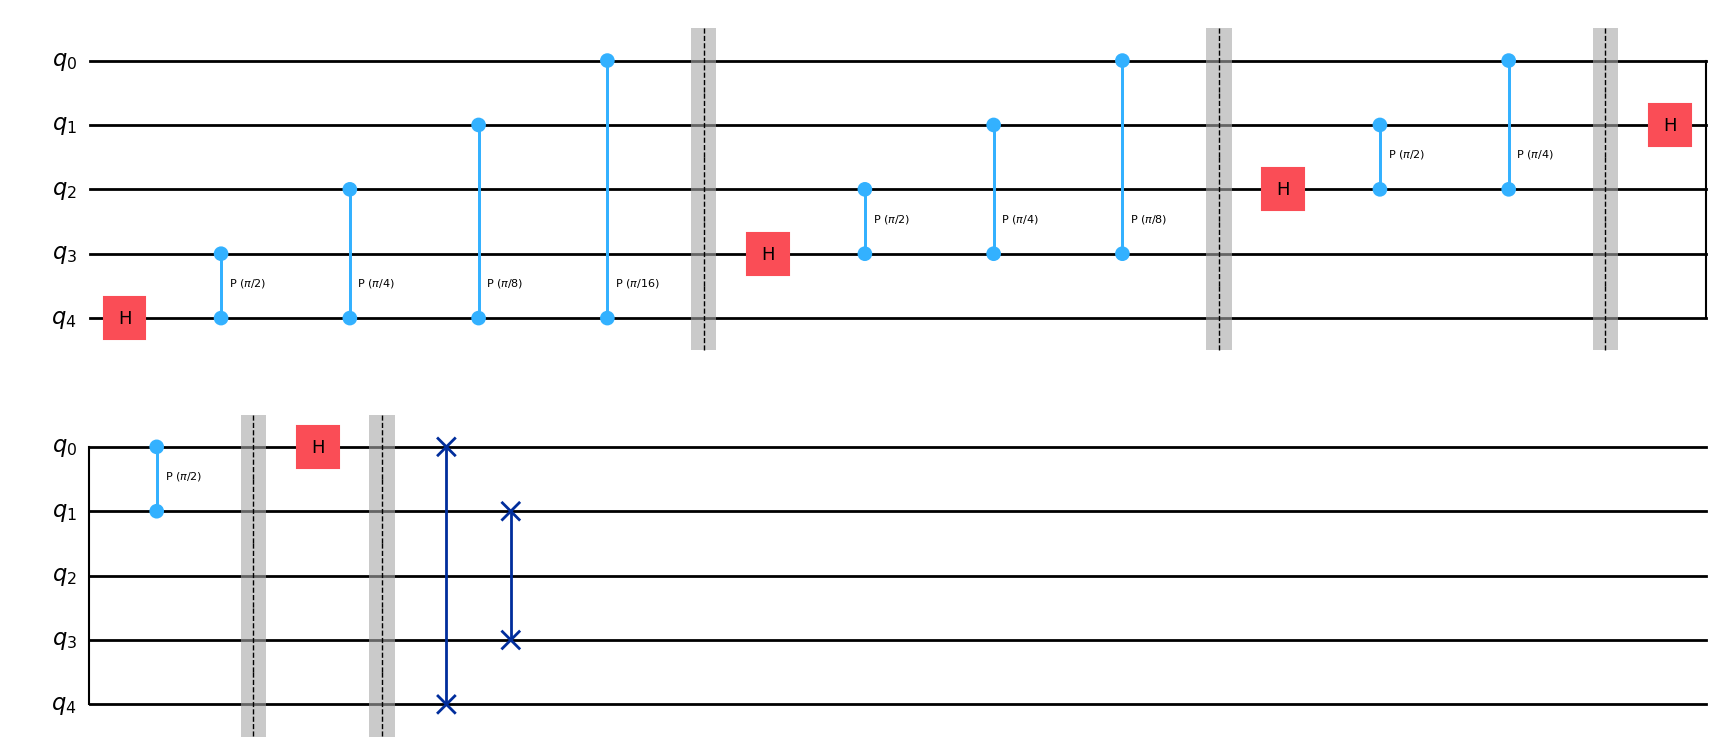

In [1]:
from qiskit import QuantumCircuit
from math import pi
n=5
qftn=QuantumCircuit(n)

for i in range(n-1,-1,-1):
    qftn.h(i)
    p=0
    for j in range(i):
        p+=1
        qftn.cp(pi/(2**(p)),i-j-1,i)
    qftn.barrier()

for i in range(int(n/2)):
    qftn.swap(i,n-1-i)

qftn.draw('mpl')

In [25]:
def qftn(n,name='QFT'):
  qftn = QuantumCircuit(n, name=name)
  for i in range(n-1,-1,-1):
    qftn.h(i)
    p=0
    for j in range(i):
      p+=1
      qftn.cp(pi/(2**(p)),i-j-1,i)
    qftn.barrier()

  for i in range(int(n/2)):
    qftn.swap(i,n-1-i)
  return qftn

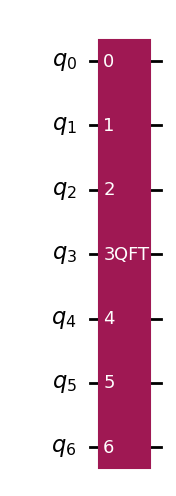

In [43]:
n=7
qc = QuantumCircuit(n)
qc.append(qftn(n), range(n))
qc.draw('mpl')

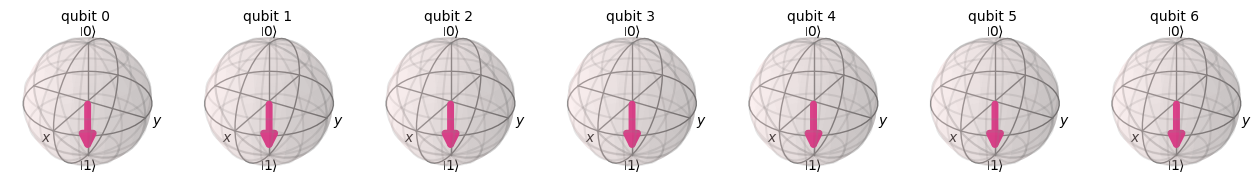

In [42]:
from qiskit import quantum_info as qi
svin = qi.Statevector.from_label('1111111')
svin.draw('bloch')


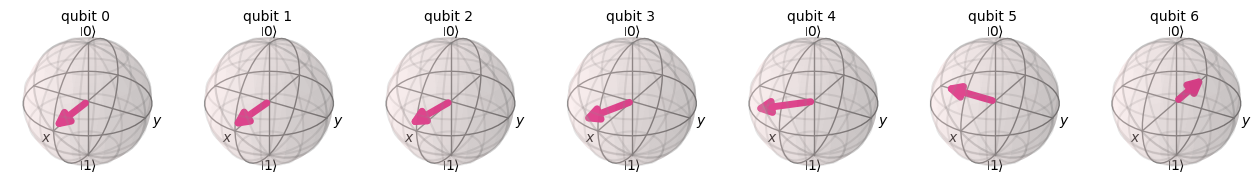

In [44]:
svout=svin.evolve(qc)
svout.draw('bloch')

# Inverse Quantum Fourier transform

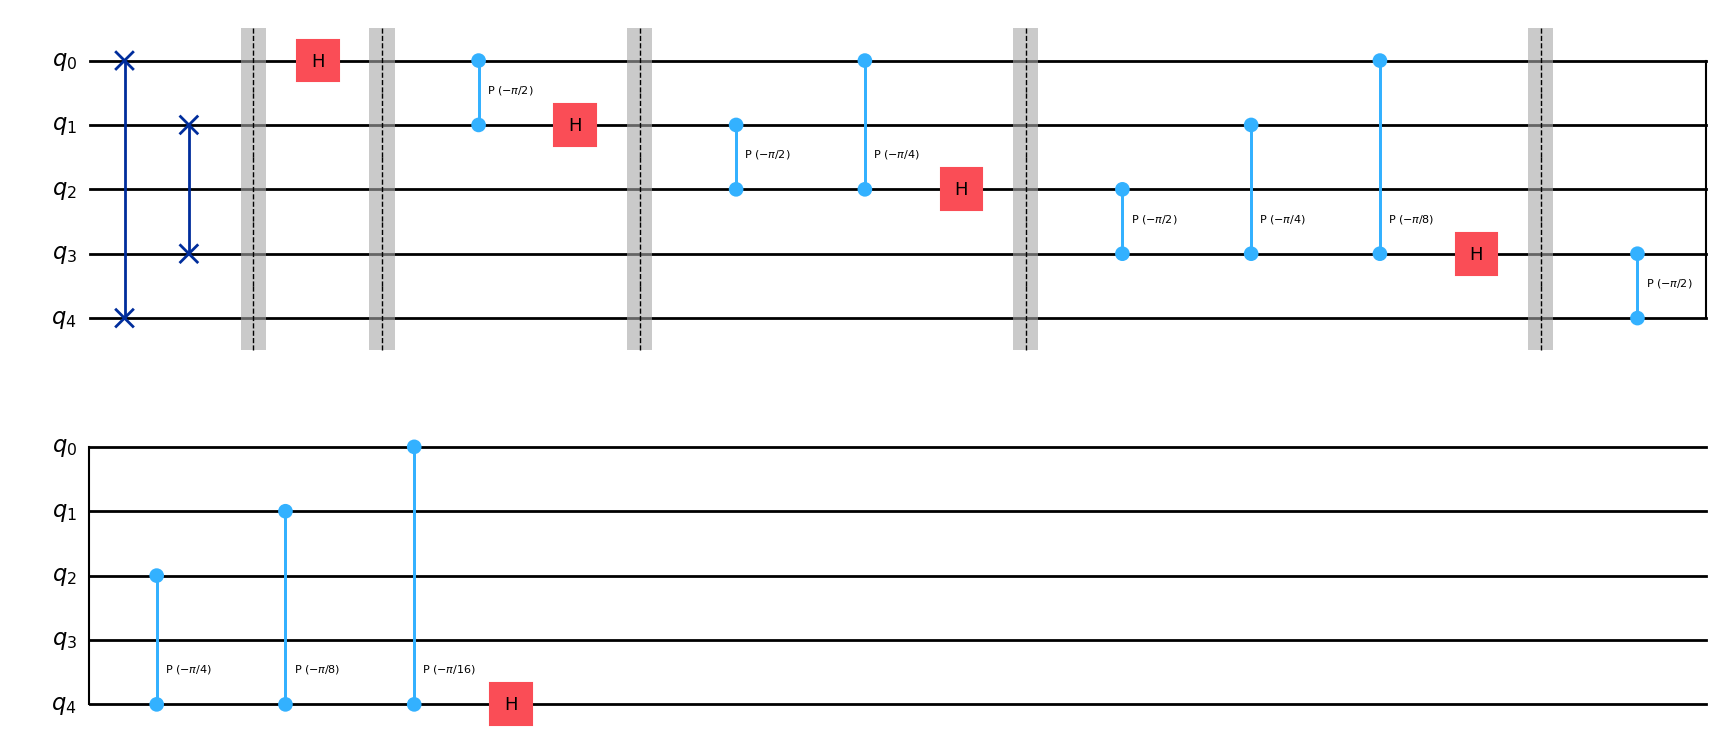

In [7]:
from qiskit import QuantumCircuit
from math import pi
n=5
iqftn=QuantumCircuit(n)
for i in range(int(n/2)):
    iqftn.swap(i,n-1-i)
for i in range(0,n):
    p=0
    iqftn.barrier()
    for j in range(i):
        p+=1
        iqftn.cp(-pi/(2**(p)),i-j-1,i)
    iqftn.h(i)
   


iqftn.draw('mpl')

In [8]:
def IQFT(n,name='IQFT'):
    iqftn=QuantumCircuit(n,name=name)
    for i in range(int(n/2)):
        iqftn.swap(i,n-1-i)
    for i in range(0,n):
        p=0
        iqftn.barrier()
        for j in range(i):
            p+=1
            iqftn.cp(-pi/(2**(p)),i-j-1,i)
        iqftn.h(i)
    return iqft